In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
#To load dataset
df=pd.read_csv('Wine.csv')

In [3]:
#To show first 5 records
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
#How many classes in customer_segment which want to predict
df["Customer_Segment"].value_counts()

2    71
1    59
3    48
Name: Customer_Segment, dtype: int64

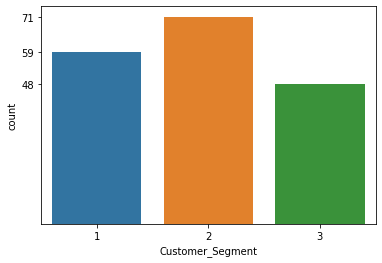

In [5]:
#visualize Customer_Segment
sns.countplot(data=df,x="Customer_Segment")
c=df["Customer_Segment"].value_counts()
plt.yticks(c)
plt.show()

In [6]:
#check null values
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [7]:
#Check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
#Separate X input and Y output from dataset df
X=df.drop("Customer_Segment",axis=1)
Y=df["Customer_Segment"]

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=1)

In [10]:
#Feature extraction technique (PCA) : Principal Component analysis
#1. Standardization
#inbuilt class StandardScaler  use formula Z-score = (Xi-mean of(X))/std(X)
from sklearn.preprocessing import StandardScaler

In [11]:
#fit_transformfor col in df:
#create object of StandardScaler class
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [12]:
X_train

array([[-1.10453814, -0.53090202, -0.13625741, ...,  0.51645351,
        -0.4182397 , -0.8519466 ],
       [-0.60884898, -0.79223988, -0.57322083, ...,  0.85655034,
         0.07607378,  0.73976188],
       [ 1.17054803, -0.47189024,  1.61159627, ...,  1.23915929,
         1.13335541,  0.66313697],
       ...,
       [ 0.68756884, -0.67421633, -0.42756636, ...,  0.09133246,
         0.28203774, -0.87981021],
       [-0.02418996,  0.29526283,  1.24746009, ..., -0.80142174,
        -0.36331598, -0.43399251],
       [ 0.12832978, -0.68264658,  0.70125581, ...,  0.68650193,
        -0.08869738,  1.3248976 ]])

In [13]:
X_test

array([[ 0.94176842,  0.67462425,  0.66484219,  0.09638535,  0.66003794,
        -0.6493993 , -1.39119415,  1.09918838, -1.26802979,  0.38990328,
         0.00630825, -1.03613156, -0.15535646],
       [-0.67239887, -0.7163676 , -0.60963445,  0.88062311,  0.73519378,
        -0.3776237 ,  0.14995588, -0.23626156,  0.1085473 , -1.21734921,
         0.4314293 ,  0.52919448, -1.32214495],
       [ 0.87821852,  0.53974019,  0.73766943, -1.40935114,  1.33644046,
         0.74145233,  1.09680622, -1.65517712,  0.19352119,  0.06172083,
         0.00630825,  1.07843169,  0.41933041],
       [-0.93930842, -1.07043825, -2.21183366, -0.90743898,  3.96689471,
        -0.6174257 , -0.66594708, -1.90557398,  1.62108262, -0.8849593 ,
         1.3666956 ,  0.68023471, -0.02300433],
       [ 1.04344824, -0.47189024,  1.17463285, -0.81333045,  1.26128463,
         1.22105634,  0.8550572 ,  0.18106655,  0.22751075,  0.5666169 ,
         0.72901403,  0.48800169,  2.2652943 ],
       [ 0.68756884,  0.952822

In [14]:
#Apply PCA
from sklearn.decomposition import PCA

In [15]:
#Create object of PCA class
pc=PCA(n_components=None,random_state=1)  
#n_components  inbuilt parameters ,here  pass no. of components means PC here total input 12 features
#input features

In [16]:
X.shape

(178, 13)

In [17]:
X_train_pc=pc.fit_transform(X_train) #for training
X_test_pc=pc.transform(X_test) #for testing

In [18]:
explain_variance=pc.explained_variance_ratio_
print(explain_variance) #automatic arrange variance in descending order

[0.35168281 0.19739103 0.11318949 0.07729222 0.06125164 0.05129145
 0.04229866 0.02624925 0.02426134 0.01824268 0.01580332 0.01324335
 0.00780277]


In [19]:
#Create object of PCA class
pc1=PCA(n_components=2,random_state=1)  
#n_components  inbuilt parameters ,here  pass no. of components =2 means PC here total input 12 features
#input features

In [20]:
X_train_pc1=pc1.fit_transform(X_train) #for training
X_test_pc1=pc1.transform(X_test) #for testing

In [21]:
explain_variance=pc1.explained_variance_ratio_
print(explain_variance) #automatic arrange variance in descending order

[0.35168281 0.19739103]


In [22]:
X_train_pc1

array([[ 0.95748971,  2.17579819],
       [-2.55013055, -1.09031172],
       [-2.32213284, -1.14232714],
       [-1.39659962,  1.40055044],
       [ 2.88922419, -0.10928569],
       [-2.59147207,  1.7259757 ],
       [ 0.10179039,  0.74634603],
       [-1.93544012, -2.07815596],
       [ 2.88140885, -1.20498819],
       [ 0.09058153,  2.65370284],
       [ 2.96437173,  0.50462603],
       [-3.55535676, -1.56919151],
       [-0.0239897 ,  2.15555787],
       [-1.22540936, -2.07333402],
       [-1.1665625 ,  2.20166638],
       [-1.52974106, -1.04134747],
       [ 3.53032658, -0.38641899],
       [ 2.43739324, -2.40183577],
       [ 2.17692392, -1.96642054],
       [ 2.72763364, -2.6090008 ],
       [ 2.06786209,  1.55631109],
       [ 0.48691891,  2.41775015],
       [-1.30643481, -0.48402511],
       [ 3.27981637, -1.83555644],
       [-2.64344105, -1.46884449],
       [ 1.33444043,  0.77303205],
       [ 2.44512858, -0.57746731],
       [-2.54518425, -1.61133618],
       [-1.11439927,

In [23]:
X_test_pc1

array([[ 2.14192399, -1.09547346],
       [-0.2042263 ,  1.70047857],
       [-2.20263757, -1.47431605],
       [-2.09927009,  0.63516441],
       [-2.25463627, -2.39947062],
       [ 2.89570209, -0.03687439],
       [ 1.01087536,  0.67998413],
       [-4.32173063, -2.69852512],
       [ 2.92715591, -0.33954135],
       [ 1.30986471,  1.43530056],
       [-1.89002443, -0.97713481],
       [-1.12985521, -1.24053593],
       [-0.44645224,  2.19194434],
       [-3.20605185, -1.61467291],
       [-1.15527849,  1.22848337],
       [ 0.05269649,  2.20245035],
       [ 1.7696635 , -1.49307197],
       [-2.08276949, -0.53500241],
       [ 1.42392188,  1.7772591 ],
       [-2.74601315, -1.97498924],
       [-2.99371228, -1.20463183],
       [-0.37694627,  1.24678864],
       [ 1.19983198, -0.33053374],
       [-2.65969339, -1.01632837],
       [-2.67190545, -1.26301311],
       [ 2.69345619, -0.43168196],
       [-2.95244505, -1.05089865],
       [-2.4190761 , -0.58238106],
       [-2.14351197,

In [24]:
#classification algorithm 
#use logistic regression algorithm
from sklearn.linear_model import LogisticRegression

#create the object of LogisticRegression
lr=LogisticRegression()

In [25]:
#Train the model then inbuilt function fit() of LogisticRegression class
lr.fit(X_train_pc1,Y_train)   #same as linearregression

LogisticRegression()

In [26]:
#test the model
Y_pred=lr.predict(X_test_pc1)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

print("Confusion Matrix : ")
#Confusion matrix
print(confusion_matrix(Y_test,Y_pred))

              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

Confusion Matrix : 
[[23  0  0]
 [ 1 18  0]
 [ 0  0 12]]


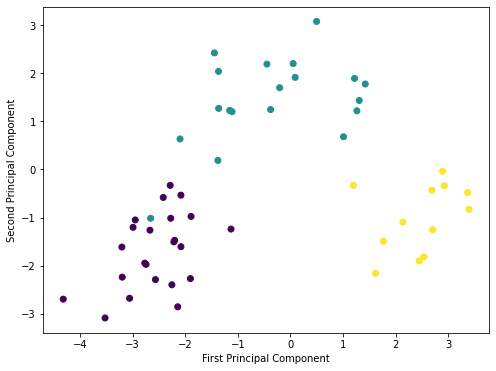

In [28]:
# giving a scatter plot
plt.figure(figsize =(8, 6))
y=Y_test
X1=X_test_pc1[:, 0]
X2=X_test_pc1[:, 1]
plt.scatter(X1,X2,c=y)#c means color

# labeling x and y axes
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()